In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
fl = '../../data/obt_slim.csv'
df = pd.read_csv(fl)

C:\Users\batoo\AppData\Local\Temp\ipykernel_21440\3821095275.py:2: DtypeWarning: Columns (6,10,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fl)


In [15]:
df.columns

Index(['facility_name', 'facility_id', 'county_name', 'state', 'condition',
       'condition_name', 'measure_name', 'payment_measure_id',
       'payment_measure_name', 'number_of_discharges',
       ...
       'patient_safety_score_lower_estimate',
       'patient_safety_score_higher_estimate', 'patient_safety_start_date',
       'patient_safety_end_date', 'has_readmissions_data', 'has_payments_data',
       'has_hospital_data', 'has_sdoh_data', 'has_patient_mix_data',
       'has_patient_survey_data'],
      dtype='object', length=300)

In [9]:
sns.set_style('whitegrid')
sns.set_palette("Set1")

AttributeError: Rectangle.set() got an unexpected keyword argument 'xlim'

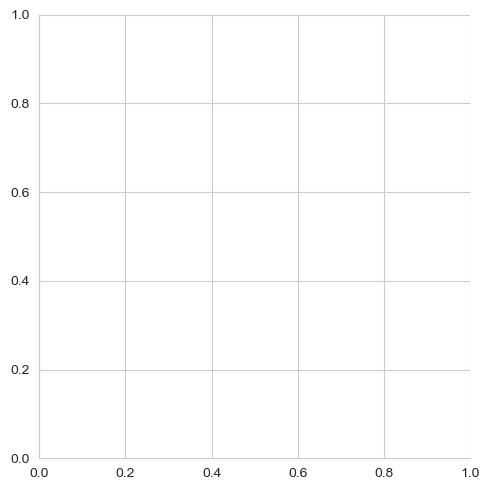

In [21]:
sns.displot(df,x='expected_readmission_rate',hue='condition',kde=True,multiple='dodge',xlim=(10,30))

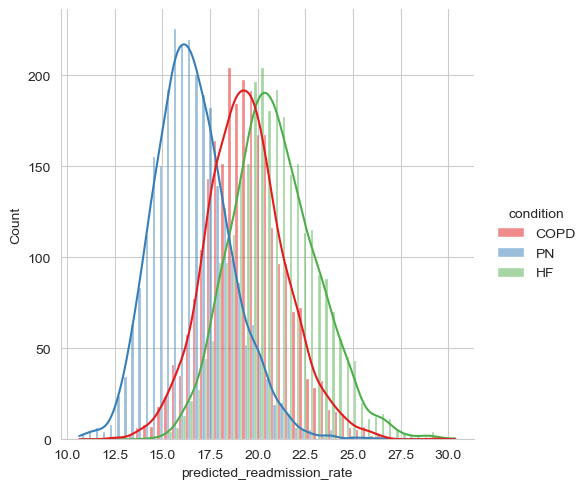

In [19]:
sns.displot(df,x='predicted_readmission_rate',hue='condition',kde=True,multiple='dodge')

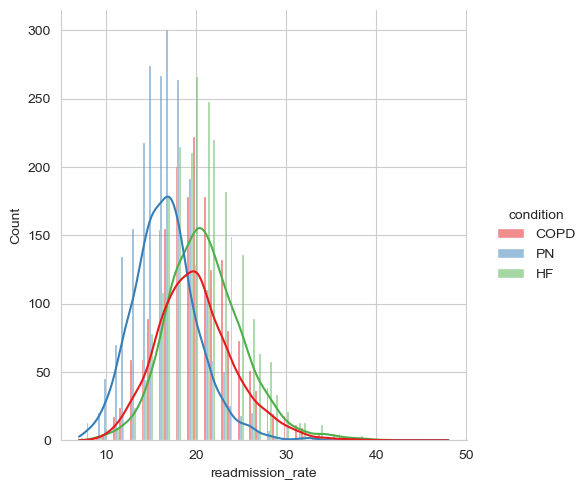

In [20]:
sns.displot(df,x='readmission_rate',hue='condition',kde=True,multiple='dodge')

In [12]:
readm = df.melt(id_vars=['county_name','condition'],value_vars=['expected_readmission_rate','predicted_readmission_rate'])
readm.dropna(subset='value',inplace=True)

In [13]:
readm.head()

,county_name,condition,variable,value
0,HOUSTON,COPD,expected_readmission_rate,19.3765
1,HOUSTON,PN,expected_readmission_rate,17.7701
2,HOUSTON,HF,expected_readmission_rate,21.8333
3,MARSHALL,COPD,expected_readmission_rate,18.2089
4,MARSHALL,PN,expected_readmission_rate,16.0472


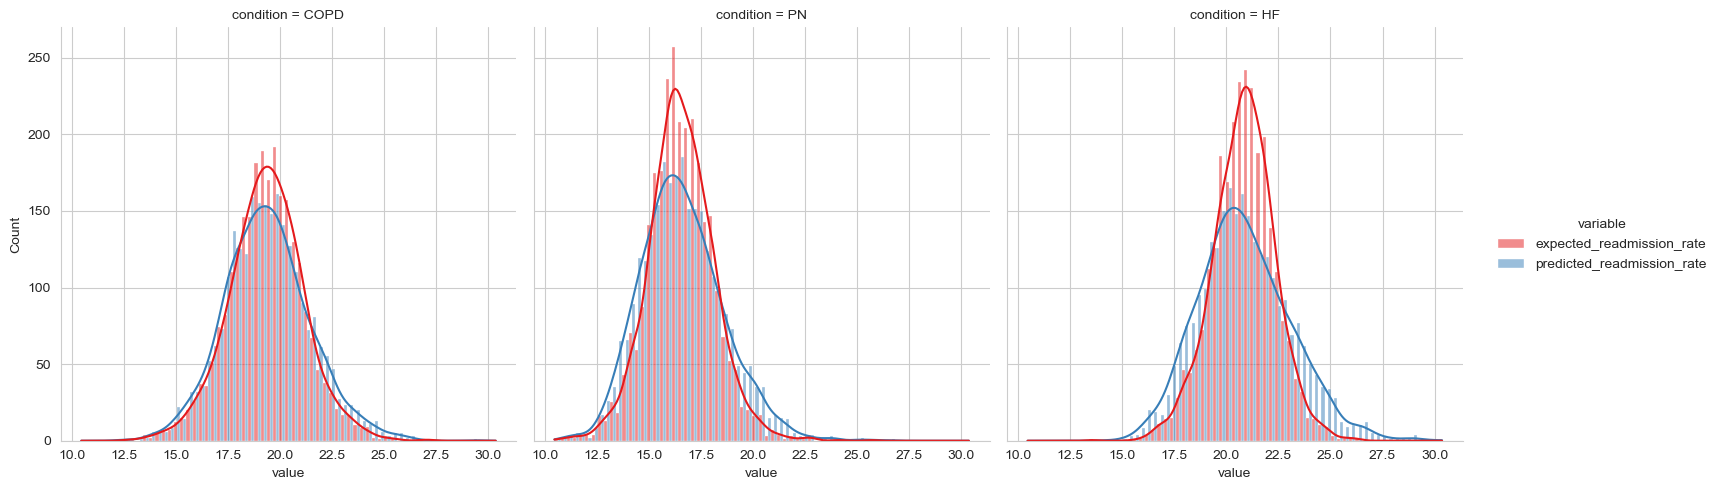

In [14]:
sns.displot(readm,x='value',col='condition',hue='variable',multiple="dodge",kde=True)